<a href="https://colab.research.google.com/github/akankshaUniyal20/Sentiment-Analysis/blob/main/SentimentAnalysis_Modeified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd
import string
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
# Importing the dataset
# data set having 1.6 million tweets
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('/content/drive/MyDrive/SentimentAnalysis/trainingDT.csv', encoding=DATASET_ENCODING , names=DATASET_COLUMNS)


In [73]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [74]:
dataset['sentiment']=dataset['sentiment'].replace(4,1);

In [75]:
dataset.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [76]:
dataset.drop(['ids', 'date','flag','user'], axis=1)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


# Data Visualization 

Both the sentiments values in the dataset have equal number of count , dataset is balanced.

<AxesSubplot:>

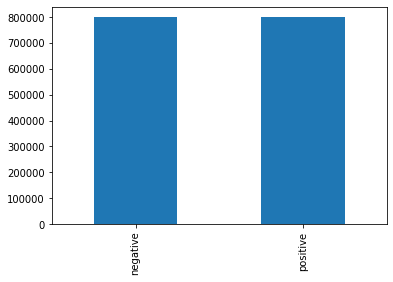

In [139]:
class_dict = {0:'negative', 1:'positive'}
dataset['sentiment'] = dataset['sentiment'].apply(lambda x:  class_dict[x])
count = dataset['sentiment'].value_counts()
count.plot(kind='bar')

# Preprocessing

In [79]:
text_data = dataset['text']

##Making Data Consistent 

When text is converted to lower case, all words are standardized into the same format, making them easier to analyze and compare. This helps eliminate any inconsistencies that may arise due to the use of uppercase or mixed case.

In [80]:
def lower_casing(text):
    text=text.lower()
    return text

In [81]:
text_data = text_data.apply(lambda x: lower_casing(x))
text_data.head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

##Noise Reduction

URLs and hashtags are a source of noise in text data, as they do not provide any meaningful information about the content of the text. By removing URLs, the amount of noise in the text data is reduced and the focus is on the relevant content.

In [82]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [83]:
text_data = text_data.apply(lambda x: remove_urls(x))
text_data.head()

0    @switchfoot  - awww, that's a bummer.  you sho...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [149]:
def cleaning_hashtag(text):
    return re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])",'',text)

In [85]:
text_data = text_data.apply (lambda x: cleaning_hashtag(x))
text_data.head()

0       awww thats a bummer  you shoulda got david ...
1    is upset that he cant update his facebook by t...
2     i dived many times for the ball managed to sa...
3      my whole body feels itchy and like its on fire 
4     no its not behaving at all im mad why am i he...
Name: text, dtype: object

In [86]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Contractions are shortened forms of words or phrases commonly used in spoken and written English.Examples of contractions include "can't" (can't be), "shall not" (wouldn't be).

Using contractions can help improve naturalness, clarity, and proficiency.

In [150]:
import contractions 
def replace_contractions(text):
    text = contractions.fix(text)
    return text

In [88]:
text_data = text_data.apply(lambda x: replace_contractions(x))
text_data.head()

0       awww that is a bummer  you shoulda got davi...
1    is upset that he cannot update his facebook by...
2     i dived many times for the ball managed to sa...
3      my whole body feels itchy and like its on fire 
4     no its not behaving at all i am mad why am i ...
Name: text, dtype: object

Replacing number to remove noise.

In [89]:
def replace_numbers(text):
    return re.sub('[0-9]+', '', text)

In [90]:
text_data = text_data.apply(lambda x: replace_numbers(x))
text_data.head()

0       awww that is a bummer  you shoulda got davi...
1    is upset that he cannot update his facebook by...
2     i dived many times for the ball managed to sa...
3      my whole body feels itchy and like its on fire 
4     no its not behaving at all i am mad why am i ...
Name: text, dtype: object

#Replacing Emoji and Emoticons

Replacing emoji and emoticons with standardized text can help ensure consistency and accuracy.

In [151]:
import emoji
def convert_emojis(text):
  return emoji.demojize(text)

In [92]:
text_data = text_data.apply (lambda x: convert_emojis(x))
text_data.head()

0       awww that is a bummer  you shoulda got davi...
1    is upset that he cannot update his facebook by...
2     i dived many times for the ball managed to sa...
3      my whole body feels itchy and like its on fire 
4     no its not behaving at all i am mad why am i ...
Name: text, dtype: object

In [152]:
import emot
def convert_emoticons(text):
    emo_obj = emot.EMOTICONS_EMO
    for emot1 in emo_obj:
        escaped_emot = re.escape(emot1)
        text = re.sub(u'({})'.format(escaped_emot), "_".join(emo_obj[emot1].replace(",","").split()), text)
    return text


In [94]:
text_data = text_data.apply (lambda x: convert_emoticons(x))
text_data.head()

0       awww that is a bummer  you shoulda got davi...
1    is upset that he cannot update his facebook by...
2     i dived many times for the ball managed to sa...
3      my whole body feels itchy and like its on fire 
4     no its not behaving at all i am mad why am i ...
Name: text, dtype: object

#Replacing Slang

Slang is informal language often used in casual conversation, social media, and other forms of communication.

Replacing slang with standard language reduces the risk of bias and ensures objective text analysis.

In [95]:
slang_dict = {
    "af": "As Fuck",
    "bae": "Before Anyone Else",
    "bb": "Bareback",
    "bff": "Best Friends Forever",
    "brb": "Be Right Back",
    "btw": "By The Way",
    "bump": "Bring Up My Post",
    "cba": "Can't Be Arsed",
    "ciao": "Goodbye",
    "cu": "See You",
    "dank": "High-Quality Marijuana",
    "dawg": "Close Friend",
    "dm": "Direct Message",
    "dope": "Cool, Awesome",
    "eod": "End Of Discussion",
    "fam": "Family",
    "fbo": "Facebook Official",
    "ffs": "For Fuck's Sake",
    "fomo": "Fear Of Missing Out",
    "fml": "Fuck My Life",
    "foodie": "A Person Who Loves Food",
    "ftfy": "Fixed That For You",
    "ftw": "For The Win",
    "fwiw": "For What It's Worth",
    "gfy": "Go Fuck Yourself",
    "gg": "Good Game",
    "gotcha": "I Understand",
    "gr8": "Great",
    "gtg": "Got To Go",
    "hbu": "How About You?",
    "icymi": "In Case You Missed It",
    "idgaf": "I Don't Give A Fuck",
    "idk": "I Don't Know",
    "ikr": "I Know, Right?",
    "imho": "In My Humble Opinion",
    "irl": "In Real Life",
    "iso": "In Search Of",
    "jelly": "Jealous",
    "jk": "Just Kidding",
    "k": "Okay",
    "kms": "Kill Myself",
    "lit": "Awesome",
    "lmao": "Laughing My Ass Off",
    "lmk": "Let Me Know",
    "lol": "Laughing Out Loud",
    "mcm": "Man Crush Monday",
    "mfw": "My Face When",
    "ngl": "Not Gonna Lie",
    "nm": "Never Mind",
    "noob": "Newbie",
    "nsfw": "Not Safe For Work",
    "nvm": "Never Mind",
    "obvi": "Obviously",
    "og": "Original Gangster",
    "omg": "Oh My God",
    "ootd": "Outfit Of The Day",
    "op": "Original Poster",
    "otw": "On The Way",
    "ppl": "People",
    "probs": "Probably",
    "rofl": "Rolling On The Floor Laughing",
    "smh": "Shaking My Head",
    "tbh": "To Be Honest",
    "tbt": "Throwback Thursday",
    "tgif": "Thank God It's Friday",
    "thot": "That Hoe Over There",
    "tl;dr": "Too Long; Didn't Read",
    "tmi": "Too Much Information",
    "ttyl": "Talk To You Later",
    "wbu": "What About You?",
    "wcw": "Woman Crush Wednesday",
    "wtf": "What The Fuck",
    "wyd": "What You Doing?"
}

In [96]:
# Function to translate the message
def chat_words_conversion(text):
    text=" ".join(slang_dict.get(word, word) for word in text.split())
    return text

In [97]:
text_data = text_data.apply (lambda x: chat_words_conversion(x))
text_data.head()

0    awww that is a bummer you shoulda got david ca...
1    is upset that he cannot update his facebook by...
2    i dived many times for the ball managed to sav...
3       my whole body feels itchy and like its on fire
4    no its not behaving at all i am mad why am i h...
Name: text, dtype: object

#Removal of punctuaton 
To enhance readability of the text.







In [98]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuations(text):
     return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [99]:
text_data = text_data.apply (lambda x: remove_punctuations(x))
text_data.head()

0    awww that is a bummer you shoulda got david ca...
1    is upset that he cannot update his facebook by...
2    i dived many times for the ball managed to sav...
3       my whole body feels itchy and like its on fire
4    no its not behaving at all i am mad why am i h...
Name: text, dtype: object

#Removing stopwords

Stop words such as "the", "and", "an", and "is" occur repeatedly in the text but do not add much meaning or value to the text. Removing these words can reduce noise in the text and improve the accuracy of natural language processing tasks.

In [100]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [101]:
text_data = text_data.apply(lambda x: remove_stopwords(x))
text_data.head()

0         awww bummer shoulda got david carr third day
1    upset cannot update facebook texting might cry...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                              behaving mad cannot see
Name: text, dtype: object

#Remove most occurring words

In [102]:
from collections import Counter
cnt = Counter()
for text in dataset["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('to', 552962),
 ('I', 496619),
 ('the', 487501),
 ('a', 366212),
 ('my', 280025),
 ('and', 275263),
 ('i', 250016),
 ('is', 217693),
 ('you', 213871),
 ('for', 209801)]

In [103]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freq(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
    

In [104]:
text_data = text_data.apply(lambda x: remove_freq(x))
text_data.head()

0         awww bummer shoulda got david carr third day
1    upset cannot update facebook texting might cry...
2    dived many times ball managed save rest go bounds
3                     whole body feels itchy like fire
4                              behaving mad cannot see
Name: text, dtype: object

# Lemmatization

Lemmatization is the process of reducing words to their base or dictionary form, which is called a lemma. The main need for lemmatization in text processing is to reduce inflectional forms of words and to group together the different forms of a word so they can be analyzed as a single item. 

It will reduce the number of unique words
and group similar word togther differnt forms of a word.


In [105]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
  pos_tagged_text = nltk.pos_tag(text.split())
  return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [106]:
text_data = text_data.apply(lambda x: lemmatize_words(x))
text_data.head()

0         awww bummer shoulda get david carr third day
1    upset cannot update facebook texting might cry...
2        dive many time ball manage save rest go bound
3                      whole body feel itchy like fire
4                                behave mad cannot see
Name: text, dtype: object

In [107]:
# creating a column to store clean text or processed text
dataset['clean_text'] =text_data

# Exploratory Data Analysis using WordCloud

Word cloud for postive words

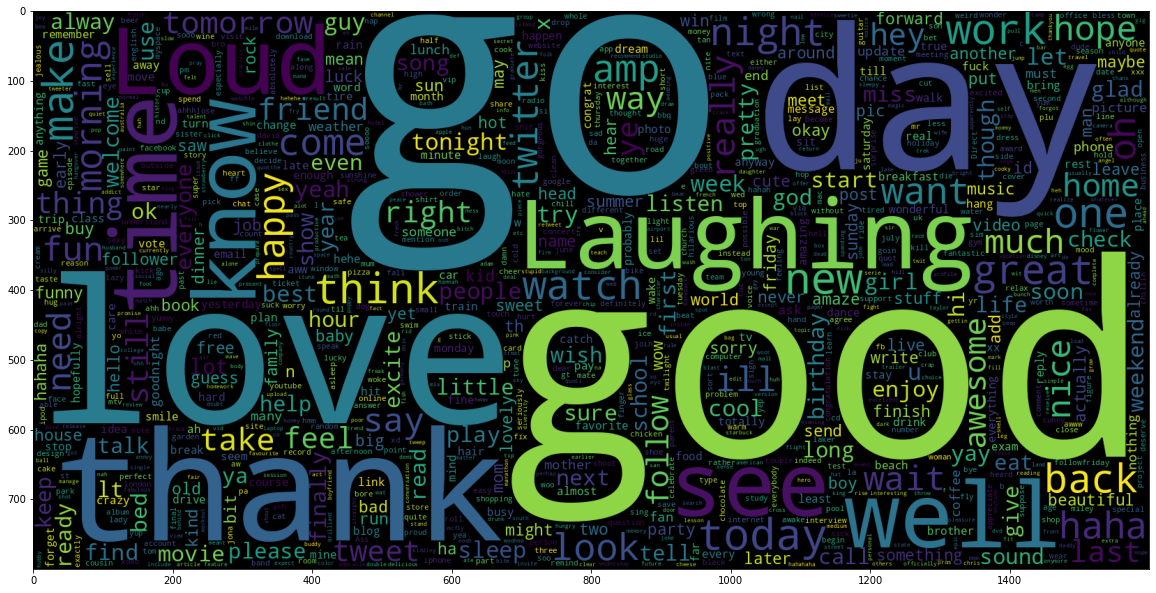

In [108]:
data_pos = dataset['clean_text'][dataset['sentiment']==1]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

Word cloud of negative words

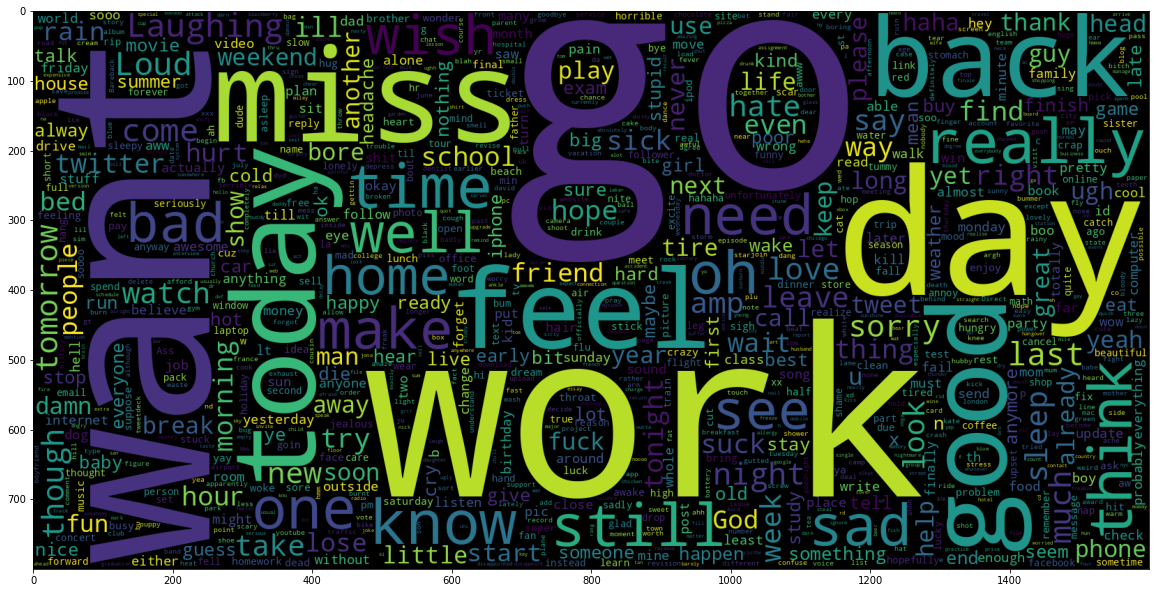

In [109]:
data_neg = dataset['clean_text'][dataset['sentiment']==0]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

# Model Building

In [156]:
# 70% data is for training and 30% is for testing
X_train, X_test, y_train, y_test = train_test_split(dataset['clean_text'], dataset['sentiment'],test_size = 0.30, random_state = 1)

Data Vectorizing

In [111]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [112]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [157]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    ax.set_title('Confusion Matrix \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

              precision    recall  f1-score   support

           0       0.79      0.75      0.77    239996
           1       0.76      0.80      0.78    240004

    accuracy                           0.77    480000
   macro avg       0.77      0.77      0.77    480000
weighted avg       0.77      0.77      0.77    480000



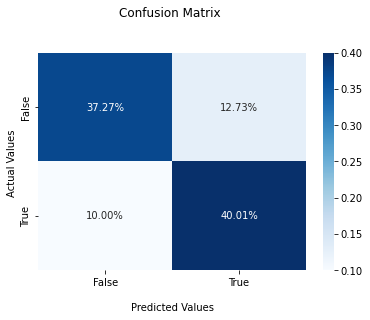

In [114]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)


              precision    recall  f1-score   support

           0       0.78      0.76      0.77    239996
           1       0.76      0.79      0.77    240004

    accuracy                           0.77    480000
   macro avg       0.77      0.77      0.77    480000
weighted avg       0.77      0.77      0.77    480000



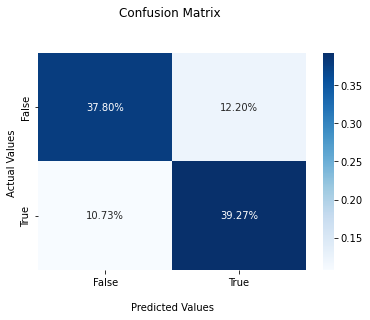

In [115]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.80      0.77      0.78    239996
           1       0.78      0.80      0.79    240004

    accuracy                           0.79    480000
   macro avg       0.79      0.79      0.79    480000
weighted avg       0.79      0.79      0.79    480000



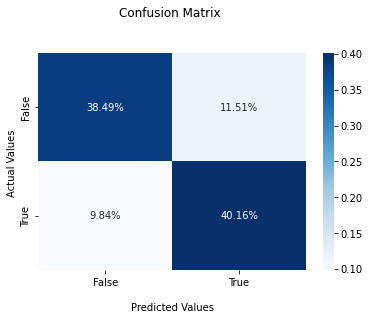

In [122]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

Trying model on random text 

In [153]:
#checking our model of some positive sentence
postive_text = [
    "Waking up to a beautiful sunrise and a hot cup of coffee is the perfect way to start the day! ☀️☕ #grateful #blessed",
    "Today is a great day!",
    "Spending time with my family always fills my heart with so much love and joy. ❤️ #familytime #blessed",
    "Just finished a productive day at work! 🤓",
    "I've been making progress in my fitness journey and it feels incredible! 💪 #healthylifestyle #progress",
    "The smell of freshly baked cookies always makes me feel happy and nostalgic.",
    "I love spending time in nature, surrounded by the beauty and tranquility of the outdoors.",
    "Just finished a productive day at work! 🤓",
    "Being surrounded by supportive and positive people fills me with a sense of belonging and warmth.",
    "Making progress towards my goals, one step at a time. 🚶‍♀️"
]
res_pos = []
negative_text = [
    "Having a rough day today. 😔",
    "The final episode was surprising with a terrible twist at the end .",
    "Dealing with a terrible headache and I can't seem to shake it off. This is not how I wanted to spend my day. 😞 #sickday #migraine",
    "I hate the feeling of being stuck in traffic, wasting hours of my day just sitting in a car.",
    "I'm feeling frustrated and unfulfilled in my job, like I'm not making any progress or achieving anything meaningful.",
    "Dealing with chronic pain and illness is a constant struggle that takes a toll on my physical and mental health.",
    "I can't believe I lost my phone! I have so many important things on there, now I'm feeling completely lost and disorganized. 😫 #lostphone #stressed",
    "Sometimes I really hate the show",
    "Feeling frustrated with the lack of progress. 😠",
    "I do not dislike horror movies."
]
res_neg = []

In [124]:
def process_text(text):
    text =lower_casing(text)
    text =remove_urls(text)
    
    text =replace_contractions(text)
    text = replace_numbers(text)
    
    text =cleaning_hashtag(text)

    text =convert_emojis(text)
    text =convert_emoticons(text)


    text =chat_words_conversion(text)
    text = remove_punctuations(text)
    text =remove_stopwords(text)
    text =lemmatize_words(text)
    
    return text

In [125]:
def process_data(sentences):
    res=[]
    for i in sentences:
        s = process_text(i)
        text_list=[]
        text_list.append(s)
        s = vectoriser.transform(text_list)
        sentiment = LRmodel.predict(s)
        if(sentiment[0]==1):
            res.append("Positive")
        else :
            res.append("Negative")
    return res
        



In [154]:
res_pos = process_data(postive_text)
res_neg = process_data(negative_text)


In [155]:
print("Result for positive sentence : ")
for i in res_pos:
    print(i)
    
print("Result for negative sentence : ")
for i in res_neg:
    print(i)

Result for positive sentence : 
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Result for negative sentence : 
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
